# Proyek Analisis Data: Bike Sharing Dataset

- Nama:Ana Safira
- Email:anasafira579@gmail.com
- Id Dicoding:


# Menentukan Pertanyaan Bisnis
- Apakah peminjaman sepeda lebih tinggi pada hari libur atau hari kerja?
- Bagaimana peminjaman sepeda pada setiap bulan? pada bulan apa peminjaman sepeda cenderung naik?


# Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

## Gathering Data

In [3]:
hour = pd.read_csv("https://raw.githubusercontent.com/anasafira00/final_project1_analisis/main/Bike-sharing-dataset/hour.csv")

In [5]:
hour_df=pd.DataFrame(hour)

In [6]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/anasafira00/final_project1_analisis/main/Bike-sharing-dataset/hour.csv")


In [8]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Assessing Data


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
print("jumlah duplikasi:", hour_df.duplicated().sum())

jumlah duplikasi: 0


In [15]:
print("jumlah duplikasi:", day_df.duplicated().sum())

jumlah duplikasi: 0


## Cleaning Data
### data sudah bersih

# Exploratory Data Analysis (EDA)

### explore rangkuman parameter statistik dari data hour_df


In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### explore max dari count

In [18]:
# Cari nilai maksimum dari kolom 'cnt'
max_cnt = hour_df['cnt'].max()

# Tampilkan nilai maksimum 'cnt'
print("Nilai maksimum dari 'cnt' (jumlah peminjaman sepeda) adalah:", max_cnt)

Nilai maksimum dari 'cnt' (jumlah peminjaman sepeda) adalah: 977


###visualisasi data

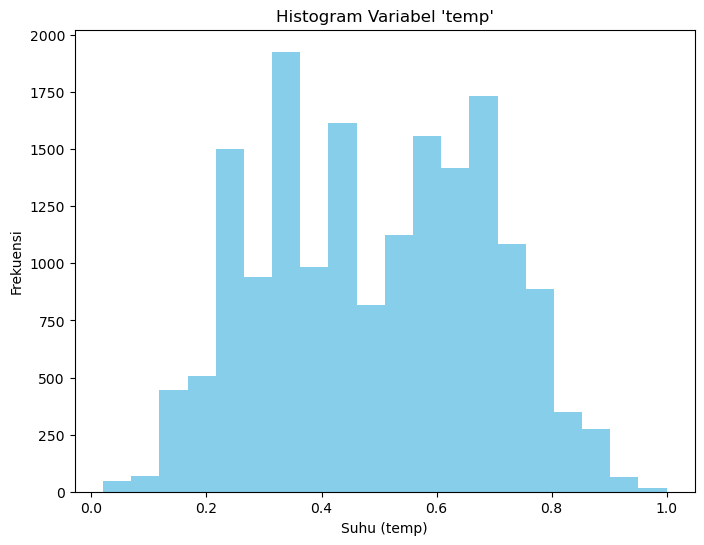

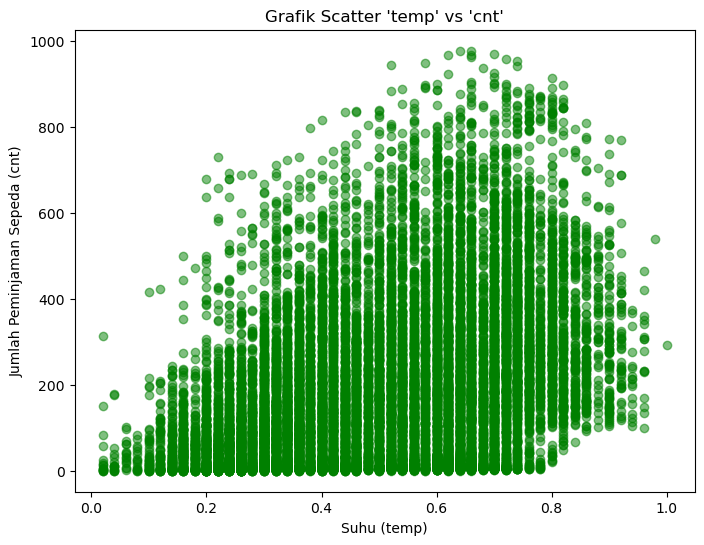

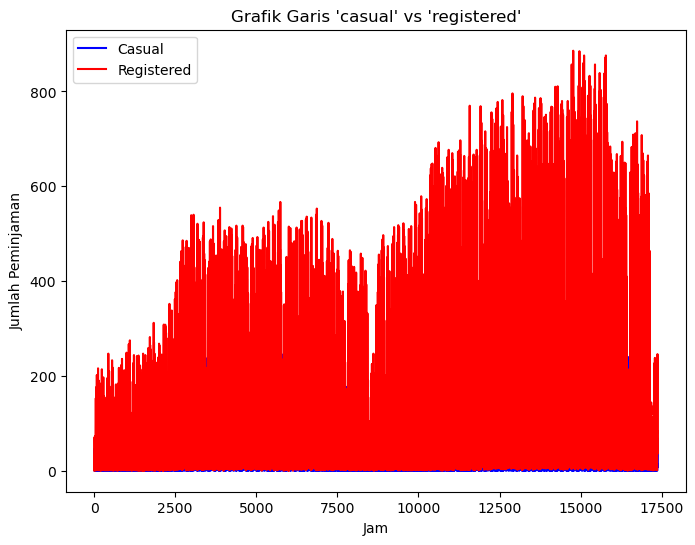

In [20]:
# Visualisasi histogram untuk variabel 'temp'
plt.figure(figsize=(8, 6))
plt.hist(hour_df['temp'], bins=20, color='skyblue')
plt.title("Histogram Variabel 'temp'")
plt.xlabel("Suhu (temp)")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi grafik scatter untuk 'temp' vs 'cnt'
plt.figure(figsize=(8, 6))
plt.scatter(hour_df['temp'], hour_df['cnt'], alpha=0.5, color='green')
plt.title("Grafik Scatter 'temp' vs 'cnt'")
plt.xlabel("Suhu (temp)")
plt.ylabel("Jumlah Peminjaman Sepeda (cnt)")
plt.show()

# Visualisasi grafik garis untuk 'casual' vs 'registered'
plt.figure(figsize=(8, 6))
plt.plot(hour_df['casual'], label='Casual', color='blue')
plt.plot(hour_df['registered'], label='Registered', color='red')
plt.title("Grafik Garis 'casual' vs 'registered'")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.legend()
plt.show()

# Visualization & Explanatory Analysis

In [23]:
# Pertanyaan 1: Apakah peminjaman sepeda lebih tinggi pada hari libur atau hari kerja?

In [27]:
# Apakah peminjaman sepeda lebih tinggi pada hari libur atau hari kerja?

# Konversi kolom 'dteday' ke tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Kelompokkan data berdasarkan 'weekday' (0-6)
grouped_data = hour_df.groupby('weekday')

# Hitung rata-rata kolom 'cnt' untuk masing-masing kelompok
average_weekday = grouped_data['cnt'].mean()

# Bandingkan rata-rata peminjaman pada akhir pekan (5-6) dan hari kerja (0-4)
average_weekend = average_weekday[5:7].mean()
average_weekday = average_weekday[0:5].mean()

# Tampilkan hasil perbandingan rata-rata peminjaman
if average_weekend > average_weekday:
    print("Peminjaman sepeda lebih tinggi pada hari libur (akhir pekan).")
elif average_weekend < average_weekday:
    print("Peminjaman sepeda lebih tinggi pada hari kerja (weekday).")
else:
    print("Peminjaman sepeda seimbang antara hari libur (akhir pekan) dan hari kerja (weekday).")

# Hitung jumlah total peminjaman pada hari kerja (weekday) dan akhir pekan (weekend)
total_weekday = grouped_data['cnt'].sum().loc[0:4].sum()
total_weekend = grouped_data['cnt'].sum().loc[5:6].sum()

# Tampilkan jumlah total peminjaman
print("\nJumlah total peminjaman pada hari kerja (weekday):", total_weekday)
print("Jumlah total peminjaman pada hari libur (akhir pekan):", total_weekend)


Peminjaman sepeda lebih tinggi pada hari libur (akhir pekan).

Jumlah total peminjaman pada hari kerja (weekday): 2327082
Jumlah total peminjaman pada hari libur (akhir pekan): 965597


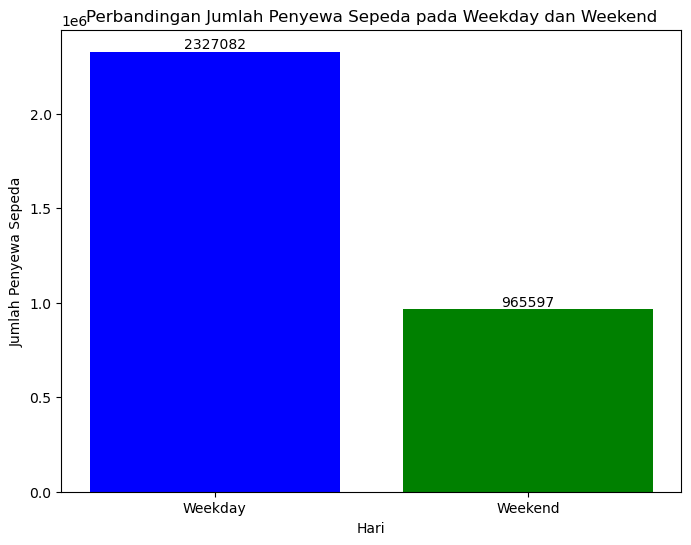

In [32]:
# Visualisasi perbandingan jumlah penyewa sepeda pada weekend dan weekday
categories = ['Weekday', 'Weekend']
counts = [total_weekday, total_weekend]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['blue', 'green'])

# Tambahkan label dengan nilai total di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.title("Perbandingan Jumlah Penyewa Sepeda pada Weekday dan Weekend")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.show()

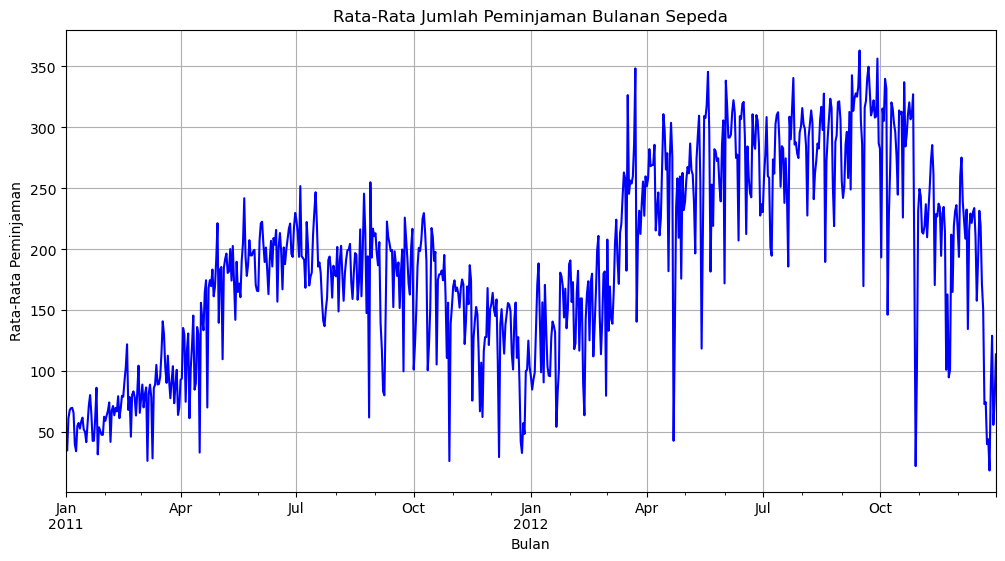

In [33]:
# Bagaimana peminjaman sepeda pada setiap bulan? pada bulan apa peminjaman sepeda cenderung naik?
# Konversi kolom 'dteday' ke tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Kelompokkan data berdasarkan tanggal (haripernama)
daily_data = hour_df.groupby('dteday')

# Hitung rata-rata peminjaman sepeda harian
average_daily_rentals = daily_data['cnt'].mean()

# Visualisasikan data
plt.figure(figsize=(12, 6))
average_daily_rentals.plot(kind='line', color='blue')
plt.title("Rata-Rata Jumlah Peminjaman Bulanan Sepeda")
plt.xlabel("Bulan")
plt.ylabel("Rata-Rata Peminjaman")
plt.grid()
plt.show()


# Conclusion
### Conclution pertanyaan 1 :
Peminjaman sepeda lebih tinggi pada hari libur (weekend) dibandingkan weekdays.

Jumlah total peminjaman pada hari kerja (weekday): 2327082
Jumlah total peminjaman pada hari libur (weekend): 965597

### conclution pertanyaan 2 :
Peminjaman sepeda cenderung naik pada bulan juli-october 2012